

# Loan data from Lending Club

**Description**

This data set represents thousands of loans made through the Lending Club platform, which is a platform that allows individuals to lend to other individuals. Of course, not all loans are created equal. Someone who is a essentially a sure bet to pay back a loan will have an easier time getting a loan with a low interest rate than someone who appears to be riskier. And for people who are very risky? They may not even get a loan offer, or they may not have accepted the loan offer due to a high interest rate. It is important to keep that last part in mind, since this data set only represents loans actually made, i.e. do not mistake this data for loan applications!
  
**Target**

1. 	Describe the dataset and any issues with it. 
2.	Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations. Additionally, all attempts should be made to make the visualizations visually appealing.
3. Use at least the 2 algorithms to predict the interest rate of the customers.


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import scipy.stats as stats
from termcolor import colored
print('OK')

OK


 # Loading Data

In [ ]:
#Read and write to excel
dataLoan =  pd.read_csv(r'loans_full_schema.csv')
dataLoan.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,18-Mar,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,18-Feb,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,18-Feb,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,18-Jan,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,18-Mar,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,...,A3,18-Jan,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,18-Jan,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,...,B5,18-Jan,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,...,C2,18-Feb,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,...,A3,18-Mar,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


## Clean data

In [ ]:
#Check the data formatting of columns
dataLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4134 entries, 0 to 4133
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         3799 non-null   object 
 1   emp_length                        3803 non-null   float64
 2   state                             4134 non-null   object 
 3   homeownership                     4134 non-null   object 
 4   annual_income                     4134 non-null   float64
 5   verified_income                   4133 non-null   object 
 6   debt_to_income                    4121 non-null   float64
 7   annual_income_joint               595 non-null    float64
 8   verification_income_joint         576 non-null    object 
 9   debt_to_income_joint              595 non-null    float64
 10  delinq_2y                         4133 non-null   float64
 11  months_since_last_delinq          1763 non-null   float64
 12  earlie

In [ ]:
# Count the null values
dataLoan.isnull().sum()

emp_title                            335
emp_length                           331
state                                  0
homeownership                          0
annual_income                          0
verified_income                        1
debt_to_income                        13
annual_income_joint                 3539
verification_income_joint           3558
debt_to_income_joint                3539
delinq_2y                              1
months_since_last_delinq            2371
earliest_credit_line                   1
inquiries_last_12m                     1
total_credit_lines                     1
open_credit_lines                      1
total_credit_limit                     1
total_credit_utilized                  1
num_collections_last_12m               1
num_historical_failed_to_pay           1
months_since_90d_late               3212
current_accounts_delinq                1
total_collection_amount_ever           1
current_installment_accounts           1
accounts_opened_

In [ ]:
# Remove columns 'months_since_last_delinq' and 'months_since_90d_late'
dataLoan = dataLoan.drop(['annual_income_joint', 'verification_income_joint','debt_to_income_joint', 'emp_title',
                          'num_accounts_120d_past_due', 'months_since_last_delinq', 'months_since_90d_late'], axis=1)


In [ ]:
# Convert NA values to mean values of the columns: emp_length, months_since_last_credit_inquiry
dataLoan = dataLoan.fillna(dataLoan.mean())


<ipython-input-7-89917df6132b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataLoan = dataLoan.fillna(dataLoan.mean())


In [ ]:
dataLoan.describe()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,4134.000000,4.134000e+03,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4.134000e+03,4134.000000,...,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000
mean,5.900342,7.769970e+04,19.242114,0.212436,2001.385918,1.952819,22.547544,11.351077,1.791363e+05,50881.589160,...,0.125817,16135.325429,43.055408,12.370024,471.263547,14283.320189,2420.403968,1836.598698,583.669284,0.135986
std,3.560518,5.891763e+04,15.789634,0.665685,7.608358,2.372508,11.813658,5.839568,1.813313e+05,52675.705898,...,0.339573,10256.743059,10.933938,5.004256,294.805983,9899.800002,3839.703728,3758.540292,506.105787,1.991696
min,0.000000,0.000000e+00,0.000000,0.000000,1967.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.500000e+04,11.050000,0.000000,1998.000000,0.000000,14.000000,7.000000,5.027600e+04,19140.500000,...,0.000000,8000.000000,36.000000,7.970000,253.197500,6649.030000,914.730000,580.160000,219.560000,0.000000
50%,5.900342,6.500000e+04,17.615000,0.000000,2003.000000,1.000000,21.000000,10.000000,1.101525e+05,36845.500000,...,0.000000,14000.000000,36.000000,11.980000,389.445000,11788.905000,1517.860000,967.325000,428.035000,0.000000
75%,10.000000,9.300000e+04,24.832500,0.000000,2006.000000,3.000000,29.000000,14.000000,2.644328e+05,65264.000000,...,0.000000,22000.000000,60.000000,15.050000,634.090000,19978.497500,2559.587500,1663.425000,796.637500,0.000000
max,10.000000,1.600001e+06,469.090000,10.000000,2015.000000,22.000000,87.000000,46.000000,2.006500e+06,783821.000000,...,3.000000,40000.000000,60.000000,30.940000,1531.050000,39115.840000,41630.443680,40000.000000,4206.180000,45.120000


## Visualize data

### 1. The largest number of borrowers in the states.

In [ ]:
summary_by_state = dataLoan.groupby(["state"], as_index=False)\
    ["loan_amount"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'no_borrowers','sum':'total_loan_amount'})

In [ ]:
summary_by_state.sort_values('no_borrowers', ascending=False, inplace=True, ignore_index=True)


In [ ]:
summary_by_state['Percentage'] = summary_by_state['no_borrowers']/summary_by_state['no_borrowers'].sum()*100


In [ ]:
summary_by_state['Cummulate']  = summary_by_state['Percentage'].cumsum()


In [ ]:
summary_by_state.head(10)

,state,no_borrowers,total_loan_amount,Percentage,Cummulate
0,CA,539,8584475.0,13.038220,13.038220
1,NY,329,5204050.0,7.958394,20.996613
2,TX,311,5221375.0,7.522980,28.519594
3,FL,291,4567325.0,7.039187,35.558781
4,NJ,157,2670100.0,3.797775,39.356555
5,IL,154,2707250.0,3.725206,43.081761
6,GA,138,2266975.0,3.338171,46.419932
7,PA,131,2015975.0,3.168844,49.588776
8,OH,129,2094500.0,3.120464,52.709240
9,NC,119,1998150.0,2.878568,55.587808


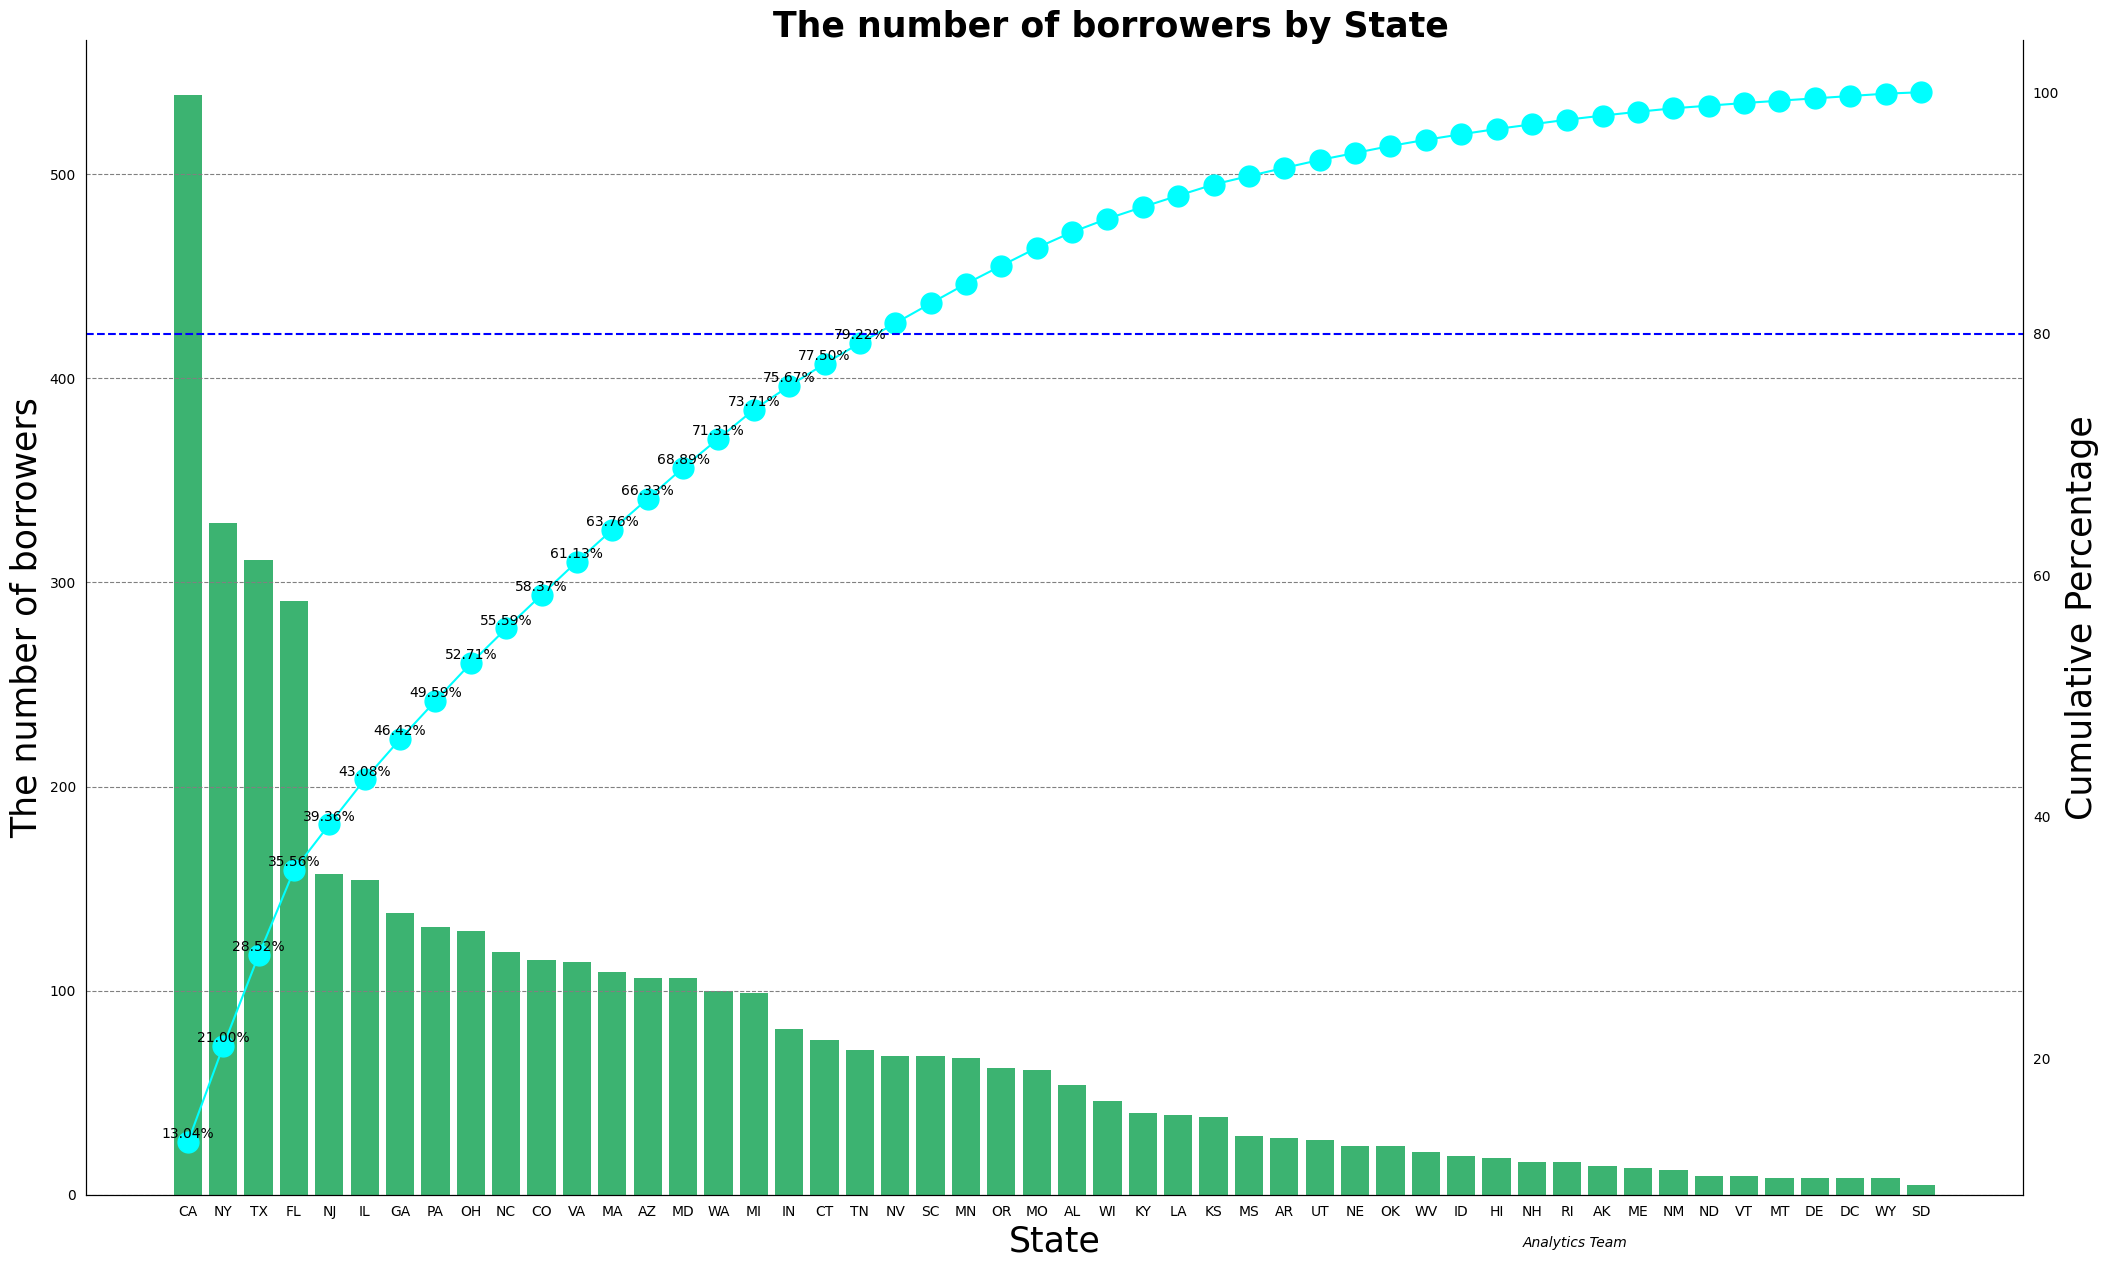

In [ ]:
# Set figure and axis
fig, ax1 = plt.subplots(figsize=(25,15))
xs = summary_by_state['state']
ys = summary_by_state['no_borrowers']
yl = summary_by_state['Cummulate']

# Plot bars
ax1.bar(xs, ys, color = '#3cb371')

ax1.set_xlabel("State", fontsize = 25)
ax1.set_ylabel("The number of borrowers", fontsize = 25)

# Second y axis (i.e. cumulative percentage)
ax2 = ax1.twinx()
ax2.plot(xs,yl, color="#00ffff", marker="o", ms=15)

ax2.axhline(80, color="blue", linestyle="--") # Create line 80%

#annotate for line
for x,y in zip(xs,yl):
    if y > 80:
        break
    else:
        label = "{:.2f}".format(y) + '%'

        ax2.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,3), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
        
ax1.yaxis.grid(color='gray', linestyle='dashed')
ax1.tick_params(left=False, bottom=False)
ax2.tick_params(right=False, bottom=False) 

ax2.set_ylabel("Cumulative Percentage", fontsize = 25)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False) 

plt.suptitle('The number of borrowers by State', fontweight='bold', size=25, horizontalalignment='left', x=0.4, y = 0.9)
plt.text(0.7, 0.075, "Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()

**Kết luận:**
CA là bang có số lượng người vay nhiều nhất lên đến 13.3%. Các bang lần lượt tiếp theo TX, NY, FL cũng có số lượng người vay vượt trội hơn so với các bang còn lại. Ngoài ra, có 20/50 bang có số lượng người vay chiếm gần 80% so với các bang còn lại.



###2. The top 10 states with the largest amount loan.

In [ ]:
summary_by_state['proportion'] = summary_by_state['total_loan_amount']/summary_by_state['total_loan_amount'].sum()*100

In [ ]:
top10_state = summary_by_state.loc[:, ['state','total_loan_amount','proportion']].head(10).copy()

In [ ]:
top10_state['total_loan_amount'] = top10_state['total_loan_amount']/1000


In [ ]:
top10_state.sort_values('total_loan_amount', ascending=True, inplace=True, ignore_index=True)


In [ ]:
top10_state

,state,total_loan_amount,proportion
0,NC,1998.150,2.995573
1,PA,2015.975,3.022296
2,OH,2094.500,3.140018
3,GA,2266.975,3.398588
4,NJ,2670.100,4.002942
5,IL,2707.250,4.058637
6,FL,4567.325,6.847211
7,NY,5204.050,7.801772
8,TX,5221.375,7.827745
9,CA,8584.475,12.869615


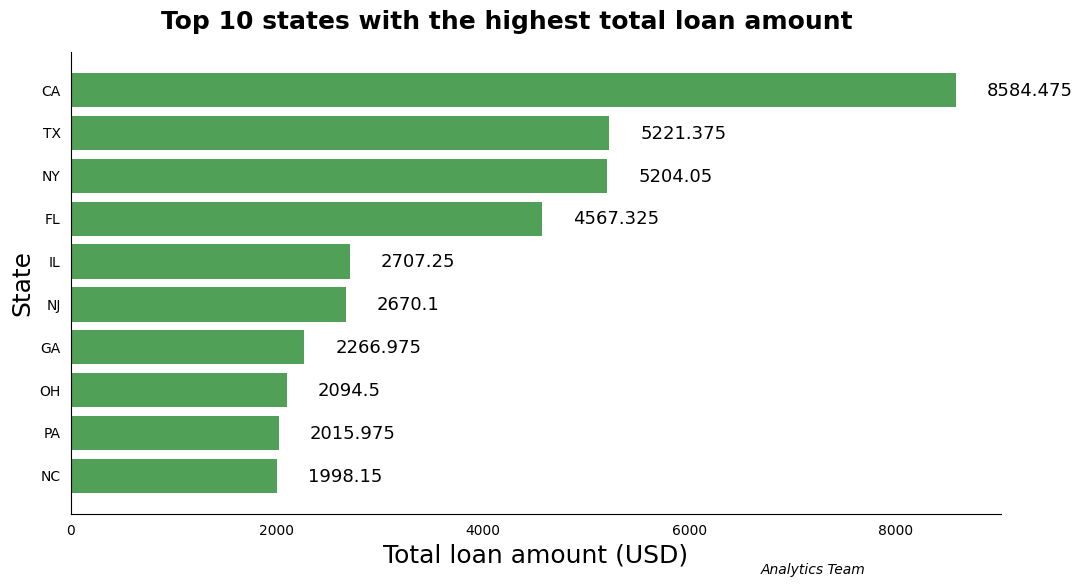

In [ ]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top10_state['state'],top10_state['total_loan_amount'],data=top10_state,color='#50a057')

# Show data
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top10_state.total_loan_amount[i], xy=(p.get_width()+300, p.get_y()+p.get_height()/3))
    t1.set(size=13)
    i+=1
    
# Remove the top line and the right line of chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False) 

# Add title, label axes and source:
plt.suptitle('Top 10 states with the highest total loan amount', fontweight='bold', size=18, horizontalalignment='left', x=0.2, y = 0.95)
plt.xlabel('Total loan amount (USD)', size=18)
plt.ylabel('State', size=18)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Kết luận:**
CA là bang có số tiền vay nhiều nhất lên đến 22.073 USD và số tiền vay giảm dần về các bang còn lại. Trong đó, bang PA có số tiền vay thấp nhất là 4665.825 USD.

###3. The most common loan purpose.

In [ ]:
summary_by_loan_purpose = dataLoan.groupby(["loan_purpose"], as_index=False)\
    ["loan_amount"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'no_borrowers','sum':'total_loan_amount'})

In [ ]:
summary_by_loan_purpose.sort_values('no_borrowers', ascending=True, inplace=True, ignore_index=True)
summary_by_loan_purpose

,loan_purpose,no_borrowers,total_loan_amount
0,renewable_energy,4,97000.0
1,moving,30,287125.0
2,vacation,31,206900.0
3,car,47,421300.0
4,small_business,53,1076400.0
5,house,58,1005550.0
6,medical,62,681625.0
7,major_purchase,123,1921450.0
8,home_improvement,263,4476075.0
9,other,385,5136850.0


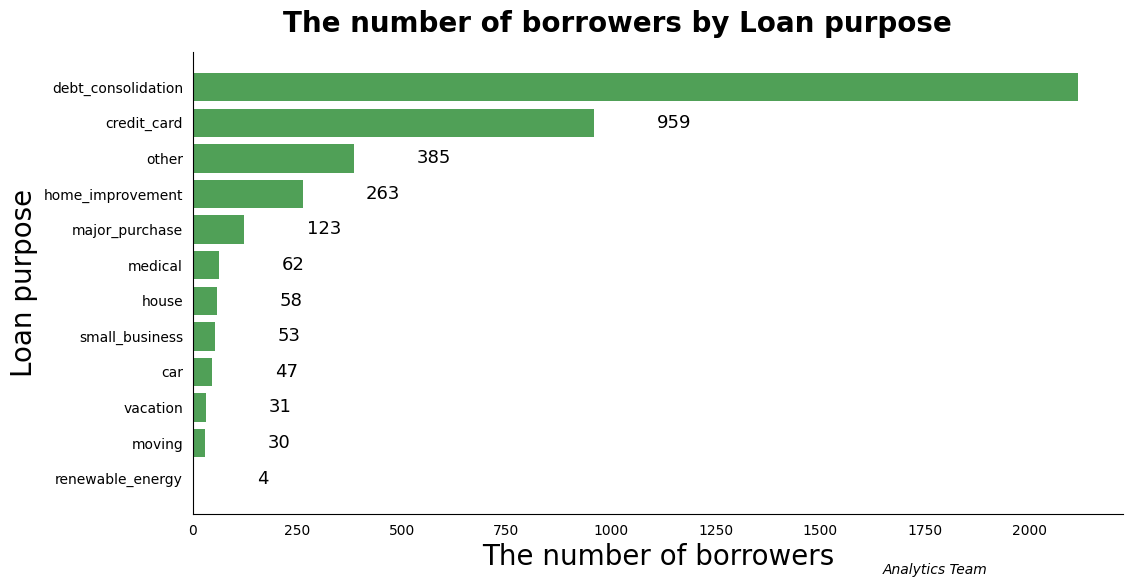

In [ ]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(summary_by_loan_purpose['loan_purpose'],summary_by_loan_purpose['no_borrowers'],data=summary_by_loan_purpose,color='#50a057')

# Show data
i = 0
for p in bar1.patches:
    t1 = ax.annotate(summary_by_loan_purpose.no_borrowers[i], xy=(p.get_width()+150, p.get_y()+p.get_height()/3))
    t1.set(size=13)
    i+=1
    
# Remove the top line and the right line of chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False) 

# Add title, label axes and source:
plt.suptitle('The number of borrowers by Loan purpose', fontweight='bold', size=20, horizontalalignment='left', x=0.2, y = 0.95)

plt.xlabel('The number of borrowers', size=20)
plt.ylabel('Loan purpose', size=20)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()


**Kết luận**: Các khoản vay phần lớn cho hoạt động hợp nhất nợ(debt_consolidation) lên đến 5144. Thấp nhất là hoạt động năng lượng tái tạo(renewable_energy) chỉ có 10 người vay tiền.

###4. The annual revenue of customers.

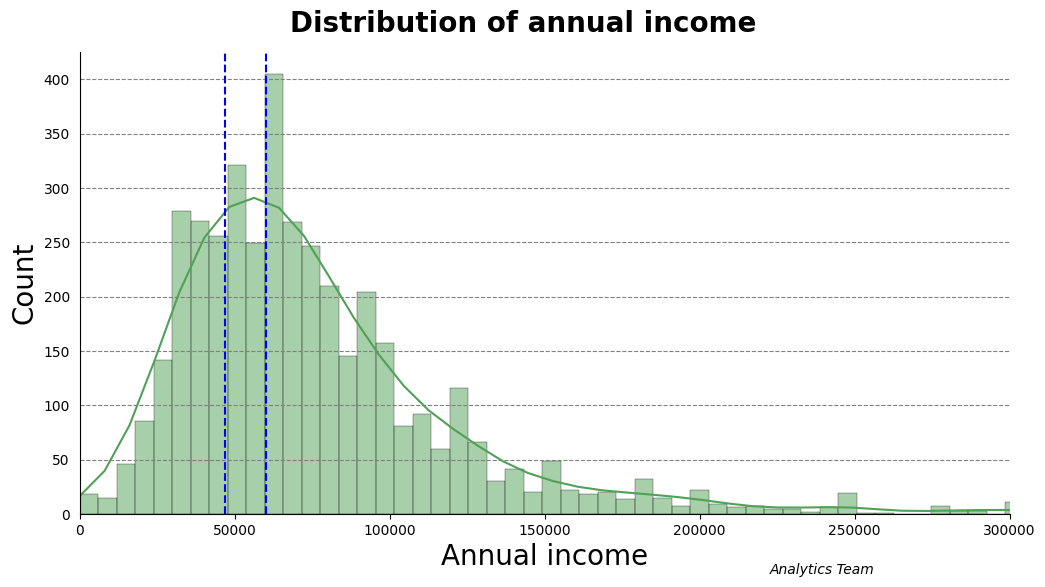

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax=sns.histplot(data=dataLoan, x=dataLoan.annual_income, kde=True, color='#50a057')
ax.axvline(47000, color="blue", linestyle="--")
ax.axvline(60000, color="blue", linestyle="--")
plt.xlim(0, 300000)

ax.yaxis.grid(color='gray', linestyle='dashed')
# # Remove the right line of chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# remove ticks on 2 axes
ax.tick_params(left=False) 

# Add title, label axes and source:
plt.suptitle('Distribution of annual income', fontweight='bold', size=20, horizontalalignment='left', x=0.3, y = 0.95)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Annual income', size=20)
plt.ylabel('Count', size=20)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Kết luận**: Thu nhập hàng năm của người vay tiền tập trung phần lớn từ 47,000 USD đến 60,000 USD.

###5. The relationship between loan status and debt on income.

In [ ]:
data = dataLoan.loc[:, ['loan_status','debt_to_income']].copy()

In [ ]:
mean_list = data.groupby('loan_status', as_index=False)['debt_to_income'].mean().rename(columns={'debt_to_income':'mean'})

In [ ]:
mean_list.sort_values('mean', ascending=True, inplace=True, ignore_index=True)

In [ ]:
mean_list

,loan_status,mean
0,Late (31-120 days),16.401071
1,Charged Off,16.712000
2,Fully Paid,17.750517
3,In Grace Period,18.497389
4,Current,19.336254
5,Late (16-30 days),19.544211


In [ ]:
data1 = pd.merge(data,mean_list,on='loan_status',how='left')

In [ ]:
data1.sort_values('mean', ascending=True, inplace=True, ignore_index=True)


In [ ]:
data1

,loan_status,debt_to_income,mean
0,Late (31-120 days),15.250000,16.401071
1,Late (31-120 days),4.670000,16.401071
2,Late (31-120 days),20.980000,16.401071
3,Late (31-120 days),21.220000,16.401071
4,Late (31-120 days),24.640000,16.401071
...,...,...,...
4129,Late (16-30 days),16.980000,19.544211
4130,Late (16-30 days),26.110000,19.544211
4131,Late (16-30 days),22.590000,19.544211
4132,Late (16-30 days),0.860000,19.544211


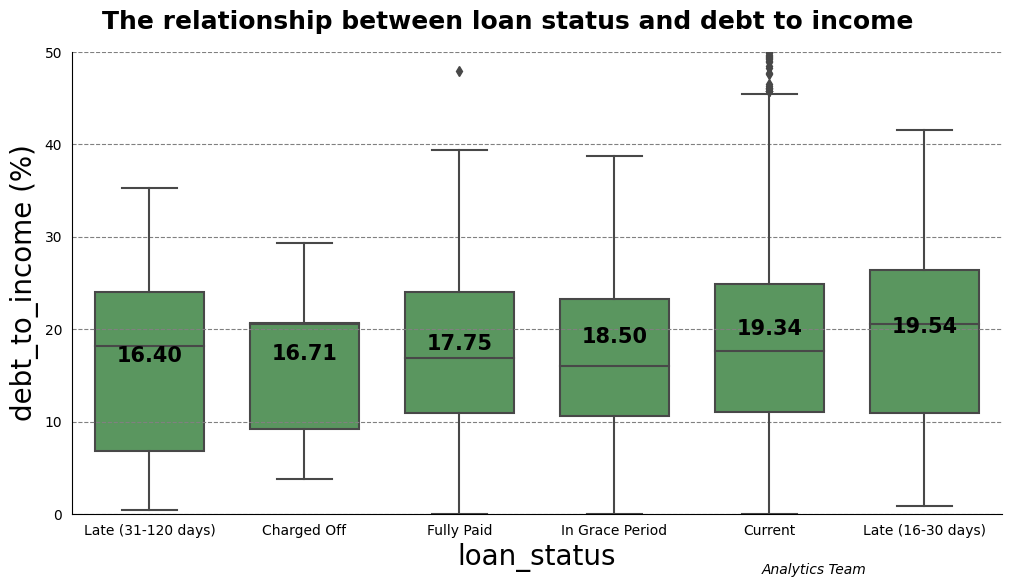

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
box_width=0.7

ax=sns.boxplot(x=data1.loan_status, y=data1.debt_to_income, data=data1, width=box_width, color='#50a057')

# show medians
i = 0
for i in range(mean_list.shape[0]):
    x = i #+box_width/2*1.05
    y = mean_list.loc[i,['mean']]
    ax.annotate('%.2f' %mean_list.loc[i,['mean']],
                  (x,y),
                  #color='white',
                  weight='semibold',
                ha='center',
                  size=15
                 )

# Add x, y gridlines
ax.yaxis.grid(color='gray', linestyle='dashed')

# Remove the top line and the right line of chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False) 

# Add title, label axes and source:
plt.suptitle('The relationship between loan status and debt to income', fontweight='bold', size=18, horizontalalignment='left', x=0.15, y = 0.95)
plt.xlabel('loan_status', size=20)
plt.ylabel('debt_to_income (%)', size=20)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.ylim(0, 50)
plt.show()

**Kết luận**
* Nhìn chung, các trạng thái khoản vay đều cao mức tỷ lệ nợ trên tổng thu nhập trung bình của từng trạng thái vay. Ngoại trừ, trạng thái vay khoản vay Charged Off (không còn khả năng trả) có tỷ lệ nợ trên tổng thu nhập là 18.46% thấp hơn mức tỷ lệ nợ trên tổng thu nhập trung bình.
* Những khoản vay trong tình trạng trễ từ 31-120 ngày lại thuộc về nhóm đối tượng vay tiền có tỷ lệ nợ trên tổng thu nhập thấp nhất là 16.04% và tỷ lệ nợ trên tổng thu nhập cao nhất là 19.95% thuộc về những khoản vay có trạng thái In Grace Period (trong thời gian gia hạn).
* Ngoài ra, những khoản vay có trạng thái Fully Paid (thanh toán đầy đủ) và trạng thái Current có tỷ lệ nợ trên tổng thu nhập lần lượt là 17.49%; 19.42% nhưng một số đối tượng nợ trên thu nhập vượt trội hơn mức 40%.

### 6. The disbursement methods used popularly.

In [ ]:
method_bins = dataLoan.copy()

In [ ]:
# Define the mapping of values to replace
value_mapping = {'DirectPay': 0, 'Cash': 1}

# Replace values in a categorical variable
column_name = 'disbursement_method'
method_bins[column_name] = method_bins[column_name].replace(value_mapping)

# Print the updated data
method_bins

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,3.000000,NJ,MORTGAGE,90000.0,Verified,18.010000,0.000000,2001.000000,6.000000,28.000000,...,C3,18-Mar,Current,whole,1.0,27015.860000,1999.330000,984.140000,1015.190000,0.000000
1,10.000000,HI,RENT,40000.0,Not Verified,5.040000,0.000000,1996.000000,1.000000,30.000000,...,C1,18-Feb,Current,whole,1.0,4651.370000,499.120000,348.630000,150.490000,0.000000
2,3.000000,WI,RENT,40000.0,Source Verified,21.150000,0.000000,2006.000000,4.000000,31.000000,...,D1,18-Feb,Current,fractional,1.0,1824.630000,281.800000,175.370000,106.430000,0.000000
3,1.000000,PA,RENT,30000.0,Not Verified,10.160000,0.000000,2007.000000,0.000000,4.000000,...,A3,18-Jan,Current,whole,1.0,18853.260000,3312.890000,2746.740000,566.150000,0.000000
4,10.000000,CA,RENT,35000.0,Verified,57.960000,0.000000,2008.000000,7.000000,22.000000,...,C3,18-Mar,Current,whole,1.0,21430.150000,2324.650000,1569.850000,754.800000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,3.000000,LA,OWN,30000.0,Source Verified,20.720000,0.000000,2003.000000,2.000000,21.000000,...,C1,18-Feb,Current,whole,1.0,13598.400000,2031.720000,1401.600000,630.120000,0.000000
4130,4.000000,TX,MORTGAGE,200000.0,Verified,21.920000,0.000000,1993.000000,0.000000,26.000000,...,A1,18-Feb,Current,whole,1.0,22415.590000,2996.700000,2584.410000,412.290000,0.000000
4131,5.900342,TX,OWN,36000.0,Not Verified,29.030000,1.000000,1981.000000,0.000000,29.000000,...,D3,18-Mar,Current,fractional,1.0,24196.310000,2800.700000,1628.690000,1172.010000,0.000000
4132,4.000000,TX,MORTGAGE,28000.0,Source Verified,6.730000,1.000000,2005.000000,1.000000,30.000000,...,C5,18-Mar,Fully Paid,whole,1.0,0.000000,15945.670110,15600.000000,345.670000,0.000000


In [ ]:
# resetting the DataFrame index
method_bins = method_bins.reset_index()

In [ ]:
method_bins.rename(columns = {'index':'customer_id'}, inplace = True)
method_bins.head(5)

,customer_id,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0.0,2001.0,6.0,...,C3,18-Mar,Current,whole,1.0,27015.86,1999.33,984.14,1015.19,0.0
1,1,10.0,HI,RENT,40000.0,Not Verified,5.04,0.0,1996.0,1.0,...,C1,18-Feb,Current,whole,1.0,4651.37,499.12,348.63,150.49,0.0
2,2,3.0,WI,RENT,40000.0,Source Verified,21.15,0.0,2006.0,4.0,...,D1,18-Feb,Current,fractional,1.0,1824.63,281.80,175.37,106.43,0.0
3,3,1.0,PA,RENT,30000.0,Not Verified,10.16,0.0,2007.0,0.0,...,A3,18-Jan,Current,whole,1.0,18853.26,3312.89,2746.74,566.15,0.0
4,4,10.0,CA,RENT,35000.0,Verified,57.96,0.0,2008.0,7.0,...,C3,18-Mar,Current,whole,1.0,21430.15,2324.65,1569.85,754.80,0.0


In [ ]:
summary_by_payment = method_bins.groupby(["disbursement_method"], as_index=False)\
    ["customer_id"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'no_payers','sum':'total_loan_amount'})

In [ ]:
summary_by_payment.sort_values('no_payers', ascending=True, inplace=True, ignore_index=True)
summary_by_payment

,disbursement_method,no_payers,total_loan_amount
0,0.0,312,626224
1,1.0,3821,7912554


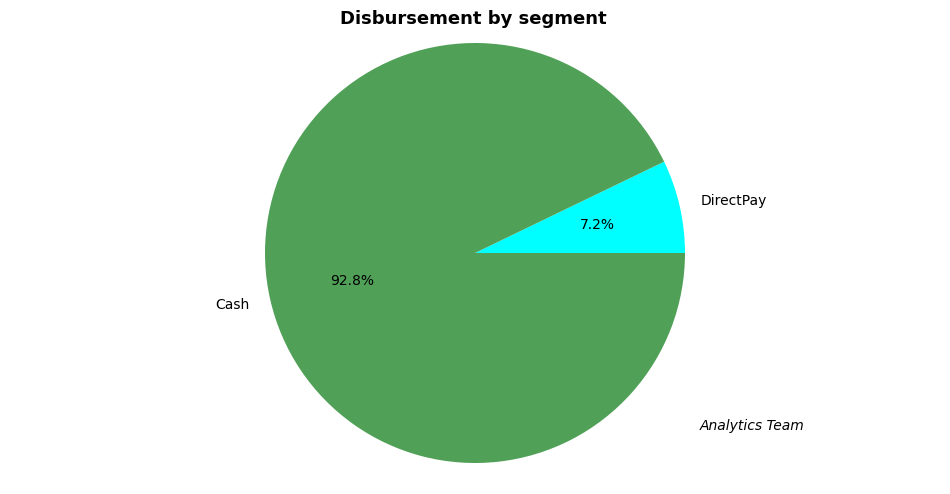

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
# Sample data
segments = ['DirectPay', 'Cash']
counts = [716, 9284]
colors = ['#00FFFF', '#50a057']
# Plotting the pie chart
plt.pie(counts, labels=segments, colors=colors, autopct='%1.1f%%',)

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Add a title

plt.suptitle('Disbursement by segment', fontweight='bold', size=13, horizontalalignment='left', x=0.4, y = 0.9)

plt.text(0.7, 0.2, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Kết luận:** Nhìn chung, ta thấy được những khách hàng được tổ chức giải ngân qua hình thức directPay (trả tiền tự động qua cổng thanh toán điện tử) là 7.2% thấp hơn rất nhiều so với Cash (thanh toán trả tiền mặt).

### 7. Segment customers by years of work experience.

In [ ]:
year_bins = dataLoan.copy()

In [ ]:
year_bins['emp_length'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4134 entries, 0 to 4133
Series name: emp_length
Non-Null Count  Dtype  
--------------  -----  
4134 non-null   float64
dtypes: float64(1)
memory usage: 32.4 KB


In [ ]:
for year_bins in [year_bins]:
    # Convert 'emp_length' column to integers
    year_bins['emp_length'] = year_bins['emp_length'].astype(int)
   
    year_bins.loc[year_bins['emp_length'] <= 1, 'AgeGroup'] = 'Fresher'
    year_bins.loc[(year_bins['emp_length'] > 1) & (year_bins['emp_length'] <= 3), 'AgeGroup'] = 'Junior'
    year_bins.loc[(year_bins['emp_length'] > 3) & (year_bins['emp_length'] <= 7), 'AgeGroup'] = 'Senior'
    year_bins.loc[year_bins['emp_length'] > 7, 'AgeGroup'] = 'Manager'

year_bins.head(5)

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,AgeGroup
0,3,NJ,MORTGAGE,90000.0,Verified,18.01,0.0,2001.0,6.0,28.0,...,18-Mar,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Junior
1,10,HI,RENT,40000.0,Not Verified,5.04,0.0,1996.0,1.0,30.0,...,18-Feb,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Manager
2,3,WI,RENT,40000.0,Source Verified,21.15,0.0,2006.0,4.0,31.0,...,18-Feb,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Junior
3,1,PA,RENT,30000.0,Not Verified,10.16,0.0,2007.0,0.0,4.0,...,18-Jan,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Fresher
4,10,CA,RENT,35000.0,Verified,57.96,0.0,2008.0,7.0,22.0,...,18-Mar,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Manager


In [ ]:
year_bins["AgeGroup"].value_counts()

Manager    1638
Senior     1133
Junior      788
Fresher     575
Name: AgeGroup, dtype: int64

In [ ]:
# resetting the DataFrame index
year_bins = year_bins.reset_index()

In [ ]:
year_bins.rename(columns = {'index':'customer_id'}, inplace = True)
year_bins.head(5)

,customer_id,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,AgeGroup
0,0,3,NJ,MORTGAGE,90000.0,Verified,18.01,0.0,2001.0,6.0,...,18-Mar,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Junior
1,1,10,HI,RENT,40000.0,Not Verified,5.04,0.0,1996.0,1.0,...,18-Feb,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Manager
2,2,3,WI,RENT,40000.0,Source Verified,21.15,0.0,2006.0,4.0,...,18-Feb,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Junior
3,3,1,PA,RENT,30000.0,Not Verified,10.16,0.0,2007.0,0.0,...,18-Jan,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Fresher
4,4,10,CA,RENT,35000.0,Verified,57.96,0.0,2008.0,7.0,...,18-Mar,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Manager


In [ ]:
# Create group_var variable
year_bins["group_var"] = year_bins.AgeGroup

In [ ]:
# groupby with row count
year_bins.groupby("group_var", dropna=False).size()

group_var
Fresher     575
Junior      788
Manager    1638
Senior     1133
dtype: int64

In [ ]:
# Convert NaN variables to Other variable to avoid errors when plot
year_bins['group_var'] = np.select([year_bins['group_var'].isnull()],\
                             ['Other'],\
                             default=year_bins['group_var'])

In [ ]:
# Prepare data
year_bins = year_bins.groupby("group_var", as_index=False, dropna=False)\
    ['customer_id'].nunique(dropna=False).\
    rename(columns={"customer_id":"no"})

year_bins["total"] = sum(year_bins['no'])
year_bins["pct"] = 100*year_bins['no'] / year_bins['total'] 

In [ ]:
year_bins.sort_values('no', ascending=True, inplace=True, ignore_index=True) 
year_bins

,group_var,no,total,pct
0,Fresher,575,4134,13.909047
1,Junior,788,4134,19.061442
2,Senior,1133,4134,27.406870
3,Manager,1638,4134,39.622642


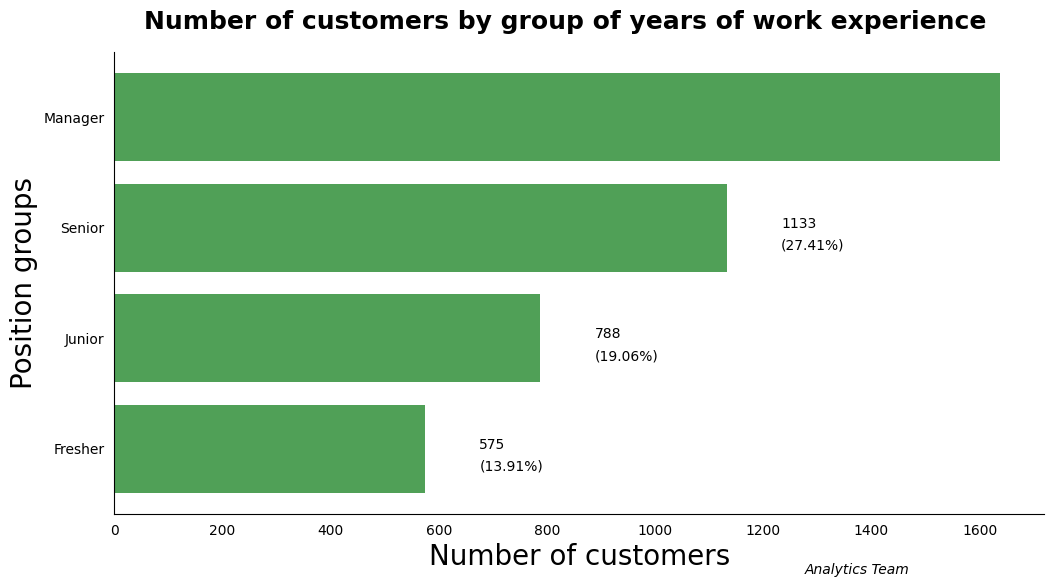

In [ ]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh('group_var', 'no', data=year_bins, color='#50a057')

# Show data
i = 0
for p in bar1.patches:
    t1 = ax.annotate(year_bins.no[i], xy=(p.get_width()+100, p.get_y()+p.get_height()/2)) 
    t2 = ax.annotate('('+str(year_bins.pct.round(2)[i])+'%)', xy=(p.get_width()+100, p.get_y()+0.2))
    t1.set(size=10)
    t2.set(size=10)
    i+=1
    
# Remove the top line and the right line of chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False) 

# Add title, label axes and source:
plt.suptitle('Number of customers by group of years of work experience', fontweight='bold', size=18, horizontalalignment='left', x=0.15, y = 0.95)
plt.xlabel('Number of customers', size=20)
plt.ylabel('Position groups', size=20)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()


**Kết luận:** 
* Biểu đồ này cho ta thấy, phần lớn những khách hàng vay tiền thuộc vị trí Manager có 3951 người chiếm đến 39.51% và tỷ trọng lượng người vay giảm dần theo thứ tự vị trí lần lượt là Senior; Junior; Fresher tương ướng với 28.45%; 18.29%; 13.75%.

###8. The relationship between interest rate and customer segment.

In [ ]:
dataLoan_grade = dataLoan.loc[:, ['grade','interest_rate']].copy()

In [ ]:
dataLoan_grade.sort_values('grade', ascending=True, inplace=True, ignore_index=True)

In [ ]:
dataLoan_grade

,grade,interest_rate
0,A,6.710000
1,A,7.970000
2,A,6.710000
3,A,6.720000
4,A,5.320000
...,...,...
4129,G,30.790000
4130,G,30.790000
4131,G,30.790000
4132,G,30.790000


In [ ]:
mean_list_grade = dataLoan_grade.groupby('grade')['interest_rate'].median()

In [ ]:
mean_list_grade

grade
A     6.72
B    10.42
C    14.07
D    19.03
E    25.81
F    28.72
G    30.79
Name: interest_rate, dtype: float64

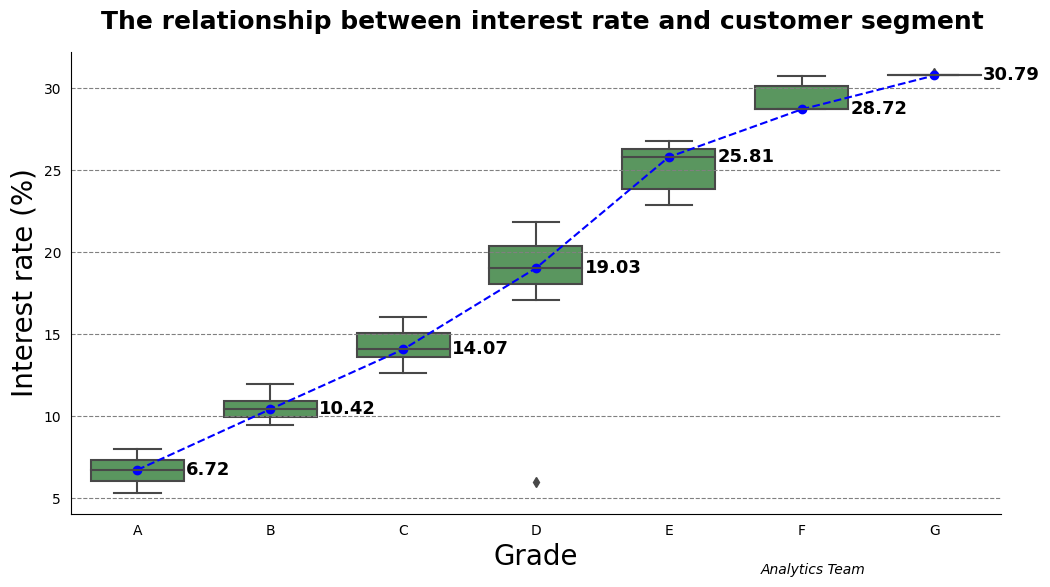

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

box_width=0.7
ax=sns.boxplot(x=dataLoan_grade.grade, y=dataLoan_grade.interest_rate, data=dataLoan_grade, width=box_width, color='#50a057')
ax.plot(range(len(mean_list_grade)), mean_list_grade, 'bo--', label= "versicolor")

# show medians
i = 0
for i in range(len(mean_list_grade)):
    x = i+box_width/2*1.05
    y = mean_list_grade[i]
    ax.annotate('%.2f' %mean_list_grade[i],
                  (x,y-0.3),
                  #color='white',
                  weight='semibold',
                  size=13
                 )

# Add x, y gridlines
ax.yaxis.grid(color='gray', linestyle='dashed')

# Remove the top line and the right line of chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False) 

# Add title, label axes and source:
plt.suptitle('The relationship between interest rate and customer segment', fontweight='bold', size=18, horizontalalignment='left', x=0.15, y = 0.95)
plt.xlabel('Grade', size=20)
plt.ylabel('Interest rate (%)', size=20)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()


**Kết luận:** 
* Thứ hạng trải dài từ mức A đến G theo thứ tự tăng dần với lãi suất cho vay từ 6.72% đến 30.79%. Thứ hạng càng tiến về G thì lãi suất cho vay càng lớn, đồng nghĩa với việc mức độ rủi ro càng cao (khả năng không trả được nợ). Và ngược lại, thứ hạng càng gần A thì lãi suất cho vay ít đi, đồng thời với việc mức độ rủi ro càng thấp. 
* Ngoài ra, phân khúc khách hàng ở mức D có một số khác hàng đặc biệt với lãi suất ưu đãi gần 6.72 % so với mức A.